In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from csv import DictReader
from datetime import datetime
from collections import defaultdict
import json
import pandas as pd
import collections

In [2]:
delay2 = []

reader = DictReader(open('DATA/delays.csv', 'rt', encoding='utf-8'))
for row in reader:
    timestamp = datetime.fromtimestamp(int(row["timestamp"])).strftime('%Y-%m-%d %H:%M')
    train_no = row["train_no"]
    train_type = row["train_type"]
    station_id = row["station_id"]
    delay_type = row["delay_type"]
    delay = row["delay"]
    delay2.append([timestamp,train_no,train_type,station_id,delay_type,delay])

delays = np.asarray(delay2)
#print(delays)

In [3]:
delays.size

19268154

In [4]:
edge = []

reader = DictReader(open('DATA/rail_edgelist.csv', 'rt', encoding='utf-8'))
for a, b in reader:
    edge.append((a, b))

edges = np.asarray(edge)
#print(delays)

In [5]:
edges.size

1070

In [6]:
slovar = defaultdict(lambda: 0)

for ts, tn, tt, si, dt, d in delays:
    slovar[tn] += int(d)

sort = {k: v for k, v in sorted(slovar.items(), key=lambda y: y[1], reverse=True)[:10]}
df = pd.DataFrame(sort.items(), columns =['Train_no', 'delay(min)'])

df

,Train_no,delay(min)
0,212,1507863
1,158,1398049
2,502,1219703
3,499,1178623
4,503,1173924
5,415,962358
6,498,897636
7,414,863110
8,246,788474
9,1415,652435


In [7]:
node = []
nodes_dict = defaultdict(lambda: 0)

reader = DictReader(open('DATA/rail_nodes.csv', 'rt', encoding='utf-8'))
for row in reader:
    id = row["id"]
    station_name = row["station_name"]
    lat = row["lat"]
    lng = row["lng"]
    
    node.append([id,station_name,lat,lng])
    nodes_dict[id] = station_name
    
nodes = np.asarray(node)
print(nodes_dict)

defaultdict(<function <lambda> at 0x000001C32C667880>, {'42200': 'Zidani Most', '43001': 'Rimske Toplice', '43002': 'Laško', '43100': 'Celje', '43101': 'Štore', '43102': 'Šentjur', '43200': 'Grobelno', '43201': 'Ponikva', '43205': 'Ostrožno', '43202': 'Dolga Gora', '43203': 'Poljčane', '43204': 'Slovenska Bistrica', '43300': 'Pragersko', '43301': 'Rače', '43302': 'Orehova vas', '43303': 'Hoče', '43304': 'Maribor Tezno', '43400': 'Maribor', '43453': 'Šentilj', '43452': 'Cirknica', '43451': 'Pesnica', '42300': 'Ljubljana', '42805': 'Ljubljana Vodmat', '42804': 'Ljubljana Rakovnik', '42803': 'Lavrica', '42802': 'Škofljica', '42801': 'Šmarje-Sap', '42800': 'Grosuplje', '42857': 'Spodnja Slivnica', '42859': 'Čušperk', '42851': 'Dobrepolje', '42852': 'Velike Lašče', '42853': 'Ortnek', '42860': 'Žlebič', '42854': 'Ribnica', '42855': 'Stara Cerkev', '42856': 'Kočevje', '42001': 'Dobova', '42002': 'Brežice', '42003': 'Libna', '42004': 'Krško', '42005': 'Brestanica', '42006': 'Blanca', '42100': 

In [8]:
nodes.size

1064

In [9]:
schedule = json.load(open('DATA/train_schedule.json', encoding="utf8"))
scheduleDf = pd.DataFrame(schedule["2924"]) 

scheduleDf 

,train_type,train_stations
0,LPV,"{'id': '42200', 'arr': None, 'dep': '19:02'}"
1,LPV,"{'id': '43001', 'arr': '19:10', 'dep': '19:10'}"
2,LPV,"{'id': '43002', 'arr': '19:16', 'dep': '19:17'}"
3,LPV,"{'id': '43100', 'arr': '19:25', 'dep': '19:27'}"
4,LPV,"{'id': '43101', 'arr': '19:31', 'dep': '19:31'}"
5,LPV,"{'id': '43102', 'arr': '19:35', 'dep': '19:36'}"
6,LPV,"{'id': '43200', 'arr': '19:39', 'dep': '19:40'}"
7,LPV,"{'id': '43201', 'arr': '19:43', 'dep': '19:44'}"
8,LPV,"{'id': '43205', 'arr': '19:48', 'dep': '19:48'}"
9,LPV,"{'id': '43202', 'arr': '19:51', 'dep': '19:51'}"


In [10]:
seznam = []
with open('DATA/train_schedule.json') as f:
    data = json.load(f)
    df=pd.DataFrame(data)
for x in df:
    print(df[x])

train_type                                                      LPV
train_stations    [{'id': '42200', 'arr': None, 'dep': '19:02'},...
Name: 2924, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43453', 'arr': '09:07', 'dep': '09:08...
Name: 4447, dtype: object
train_type                                                       LP
train_stations    [{'id': '42300', 'arr': None, 'dep': '04:55'},...
Name: 4487, dtype: object
train_type                                                       EN
train_stations    [{'id': '42001', 'arr': '21:51', 'dep': '22:06...
Name: 498, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42001', 'arr': None, 'dep': '12:08'},...
Name: 2262, dtype: object
train_type                                                       LP
train_stations    [{'id': '43600', 'arr': None, 'dep': '05:53'},...
Name: 4100, dtype: object
train_type                   

Name: 2920, dtype: object
train_type                                                       LP
train_stations    [{'id': '43854', 'arr': None, 'dep': '14:36'},...
Name: 3612, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42300', 'arr': None, 'dep': '00:50'},...
Name: 2006, dtype: object
train_type                                                       LP
train_stations    [{'id': '42300', 'arr': None, 'dep': '09:30'},...
Name: 3289, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42300', 'arr': None, 'dep': '09:55'},...
Name: 2406, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43400', 'arr': None, 'dep': '12:25'},...
Name: 2801, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43400', 'arr': None, 'dep': '19:55'},...
Name: 4444, dtype: object
tr

Name: 4453, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42300', 'arr': None, 'dep': '14:47'},...
Name: 2412, dtype: object
train_type                                                       LP
train_stations    [{'id': '43100', 'arr': None, 'dep': '13:21'},...
Name: 7811, dtype: object
train_type                                                       LP
train_stations    [{'id': '44700', 'arr': None, 'dep': '11:20'},...
Name: 4294, dtype: object
train_type                                                       LP
train_stations    [{'id': '42511', 'arr': None, 'dep': '04:17'},...
Name: 3226, dtype: object
train_type                                                       LP
train_stations    [{'id': '42800', 'arr': None, 'dep': '10:34'},...
Name: 4475, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42200', 'arr': None, 'dep': '04:33'},...
Name: 2301, dtype: object
tr

Name: 3517, dtype: object
train_type                                                       LP
train_stations    [{'id': '43600', 'arr': None, 'dep': '16:47'},...
Name: 3836, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43300', 'arr': None, 'dep': '13:25'},...
Name: 2504, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43300', 'arr': None, 'dep': '13:25'},...
Name: 2512, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43605', 'arr': None, 'dep': '14:10'},...
Name: 2506, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43203', 'arr': None, 'dep': '17:20'},...
Name: 2988, dtype: object
train_type                                                       LP
train_stations    [{'id': '42600', 'arr': None, 'dep': '08:42'},...
Name: 3221, dtype: object
tr

Name: 414, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42207', 'arr': None, 'dep': '22:02'},...
Name: 2240, dtype: object
train_type                                                       LP
train_stations    [{'id': '44712', 'arr': None, 'dep': '10:24'},...
Name: 4228, dtype: object
train_type                                                      LPV
train_stations    [{'id': '44100', 'arr': None, 'dep': '09:34'},...
Name: 2713, dtype: object
train_type                                                       LP
train_stations    [{'id': '42100', 'arr': None, 'dep': '16:50'},...
Name: 3379, dtype: object
train_type                                                       LP
train_stations    [{'id': '42856', 'arr': None, 'dep': '06:33'},...
Name: 4472, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42300', 'arr': None, 'dep': '18:47'},...
Name: 1896, dtype: object
tra

Name: 2433, dtype: object
train_type                                                       LP
train_stations    [{'id': '43503', 'arr': '22:34', 'dep': '22:34...
Name: 4479, dtype: object
train_type                                                      LPV
train_stations    [{'id': '44352', 'arr': None, 'dep': '19:15'},...
Name: 2753, dtype: object
train_type                                                       IC
train_stations    [{'id': '43400', 'arr': None, 'dep': '15:20'},...
Name: 519, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42400', 'arr': None, 'dep': '14:23'},...
Name: 2417, dtype: object
train_type                                                       LP
train_stations    [{'id': '42600', 'arr': None, 'dep': '15:20'},...
Name: 3283, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42300', 'arr': None, 'dep': '14:20'},...
Name: 2209, dtype: object
tra

Name: 2200, dtype: object
train_type                                                       LP
train_stations    [{'id': '43800', 'arr': None, 'dep': '09:30'},...
Name: 3719, dtype: object
train_type                                                       LP
train_stations    [{'id': '42353', 'arr': None, 'dep': '06:40'},...
Name: 3103, dtype: object
train_type                                                       LP
train_stations    [{'id': '43600', 'arr': None, 'dep': '12:05'},...
Name: 3840, dtype: object
train_type                                                       MO
train_stations    [{'id': '44303', 'arr': '17:12', 'dep': '17:15...
Name: 7706, dtype: object
train_type                                                      LPV
train_stations    [{'id': '44100', 'arr': None, 'dep': '18:30'},...
Name: 2715, dtype: object
train_type                                                       LP
train_stations    [{'id': '42800', 'arr': None, 'dep': '17:54'},...
Name: 4485, dtype: object
tr

Name: 3282, dtype: object
train_type                                                       RG
train_stations    [{'id': '43400', 'arr': None, 'dep': '03:30'},...
Name: 1605, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43704', 'arr': None, 'dep': '09:31'},...
Name: 2501, dtype: object
train_type                                                       LP
train_stations    [{'id': '42300', 'arr': None, 'dep': '04:12'},...
Name: 4471, dtype: object
train_type                                                       LP
train_stations    [{'id': '43910', 'arr': None, 'dep': '15:20'},...
Name: 3511, dtype: object
train_type                                                       LP
train_stations    [{'id': '44700', 'arr': None, 'dep': '17:19'},...
Name: 4291, dtype: object
train_type                                                       LP
train_stations    [{'id': '42300', 'arr': None, 'dep': '06:51'},...
Name: 4290, dtype: object
tr

In [11]:
df.size

1232

In [12]:
with open('DATA/train_schedule.json') as json_file:
    data = json.load(json_file)
for x in data:
    print(x)
    print(data[x])

2924
{'train_type': 'LPV', 'train_stations': [{'id': '42200', 'arr': None, 'dep': '19:02'}, {'id': '43001', 'arr': '19:10', 'dep': '19:10'}, {'id': '43002', 'arr': '19:16', 'dep': '19:17'}, {'id': '43100', 'arr': '19:25', 'dep': '19:27'}, {'id': '43101', 'arr': '19:31', 'dep': '19:31'}, {'id': '43102', 'arr': '19:35', 'dep': '19:36'}, {'id': '43200', 'arr': '19:39', 'dep': '19:40'}, {'id': '43201', 'arr': '19:43', 'dep': '19:44'}, {'id': '43205', 'arr': '19:48', 'dep': '19:48'}, {'id': '43202', 'arr': '19:51', 'dep': '19:51'}, {'id': '43203', 'arr': '19:57', 'dep': '19:58'}, {'id': '43204', 'arr': '20:04', 'dep': '20:05'}, {'id': '43300', 'arr': '20:09', 'dep': '20:10'}, {'id': '43301', 'arr': '20:14', 'dep': '20:15'}, {'id': '43302', 'arr': '20:17', 'dep': '20:17'}, {'id': '43303', 'arr': '20:19', 'dep': '20:20'}, {'id': '43304', 'arr': '20:24', 'dep': '20:24'}, {'id': '43400', 'arr': '20:27', 'dep': None}]}
4447
{'train_type': 'LPV', 'train_stations': [{'id': '43453', 'arr': '09:07',

In [13]:
df

,2924,4447,4487,498,2262,4100,7807,3171,7812,4455,...,2426,3831,3615,2258,2982,2608,2451,640,517,4255
train_type,LPV,LPV,LP,EN,LPV,LP,MO,LP,LP,LPV,...,LPV,LP,LP,LPV,LPV,LPV,LPV,RG,IC,LP
train_stations,"[{'id': '42200', 'arr': None, 'dep': '19:02'},...","[{'id': '43453', 'arr': '09:07', 'dep': '09:08...","[{'id': '42300', 'arr': None, 'dep': '04:55'},...","[{'id': '42001', 'arr': '21:51', 'dep': '22:06...","[{'id': '42001', 'arr': None, 'dep': '12:08'},...","[{'id': '43600', 'arr': None, 'dep': '05:53'},...","[{'id': '43652', 'arr': '18:28', 'dep': '18:30...","[{'id': '42356', 'arr': None, 'dep': '08:18'},...","[{'id': '43806', 'arr': '17:36', 'dep': '17:39...","[{'id': '43453', 'arr': '20:31', 'dep': '20:32...",...,"[{'id': '42300', 'arr': None, 'dep': '20:43'},...","[{'id': '43652', 'arr': None, 'dep': '16:20'},...","[{'id': '43800', 'arr': None, 'dep': '15:11'},...","[{'id': '42001', 'arr': None, 'dep': '10:10'},...","[{'id': '43203', 'arr': None, 'dep': '07:30'},...","[{'id': '44200', 'arr': None, 'dep': '16:21'},...","[{'id': '42307', 'arr': None, 'dep': '14:41'},...","[{'id': '43400', 'arr': None, 'dep': '09:20'},...","[{'id': '43400', 'arr': None, 'dep': '10:50'},...","[{'id': '44700', 'arr': None, 'dep': '13:50'},..."


In [14]:
ts_delays = defaultdict(lambda: 0)
ts_delays_d = defaultdict(lambda: 0)
ts_delays_a = defaultdict(lambda: 0)
ts_delays_e = defaultdict(lambda: 0)


for ts, tn, tt, si, dt, d in delays:
    month = ts[5:7]
    if (int(d) > 0):
        ts_delays[month] += 1
        if (dt == "D"):
            ts_delays_d[month] += 1
        if (dt == "A"):
            ts_delays_a[month] += 1
        if (dt == "E"):
            ts_delays_e[month] += 1
        
#sort_ts_delays = {k: v for k, v in sorted(ts_delays.items(), key=lambda y: y[1], reverse=True)}

sort_ts_delays = collections.OrderedDict(sorted(ts_delays.items()))
sort_ts_delays_d = collections.OrderedDict(sorted(ts_delays_d.items()))
sort_ts_delays_a = collections.OrderedDict(sorted(ts_delays_a.items()))
sort_ts_delays_e = collections.OrderedDict(sorted(ts_delays_e.items()))

print(sort_ts_delays)
print(sort_ts_delays_d)
print(sort_ts_delays_a)
print(sort_ts_delays_e)

OrderedDict([('01', 127981), ('02', 191807), ('03', 214360), ('04', 131746), ('05', 188547), ('06', 299790), ('07', 381954), ('08', 571976), ('09', 559691), ('10', 418218), ('11', 56966), ('12', 57038)])
OrderedDict([('01', 112668), ('02', 167231), ('03', 185009), ('04', 107274), ('05', 160974), ('06', 249189), ('07', 317151), ('08', 469621), ('09', 471696), ('10', 348671), ('11', 47541), ('12', 49800)])
OrderedDict([('01', 7569), ('02', 11755), ('03', 15328), ('04', 9636), ('05', 13625), ('06', 17727), ('07', 33143), ('08', 45379), ('09', 44420), ('10', 26396), ('11', 4916), ('12', 5261)])
OrderedDict([('01', 7744), ('02', 12821), ('03', 14023), ('04', 14836), ('05', 13948), ('06', 32874), ('07', 31660), ('08', 56976), ('09', 43575), ('10', 43151), ('11', 4509), ('12', 1977)])


Text(0, 0.5, 'Delays')

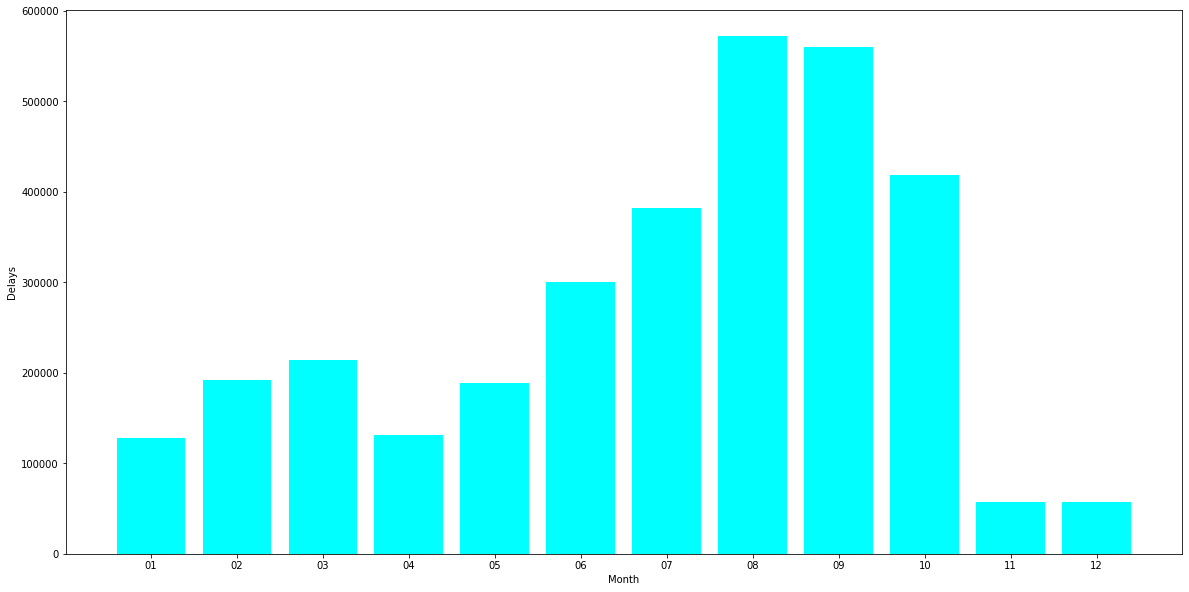

In [15]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.bar(sort_ts_delays.keys(), sort_ts_delays.values(),color="cyan")
plt.xlabel("Month")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

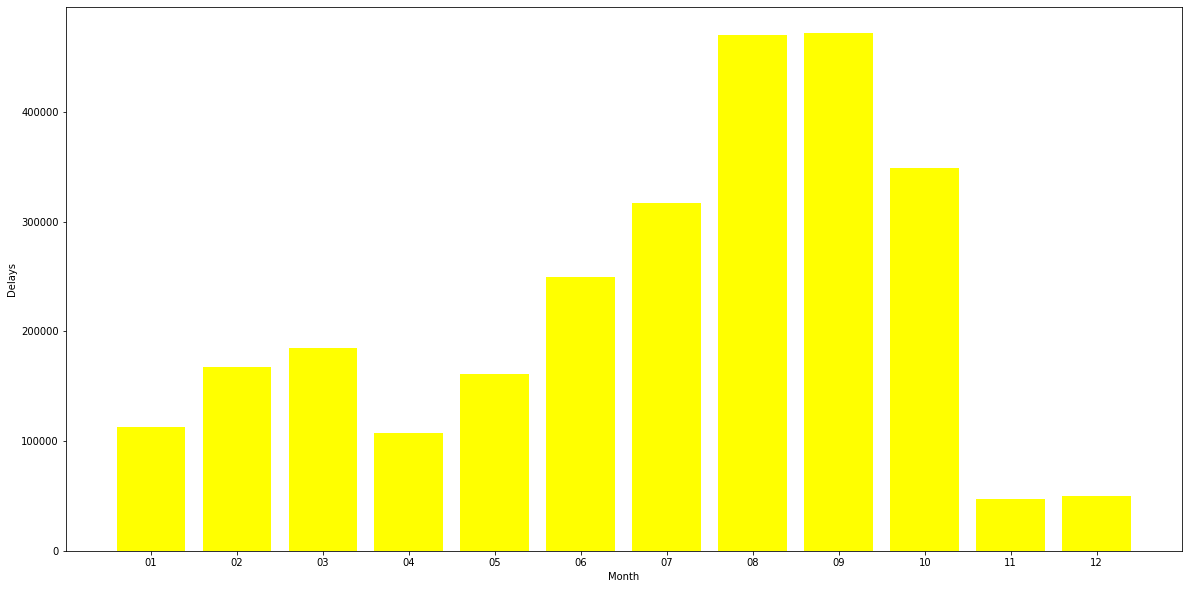

In [16]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.bar(sort_ts_delays_d.keys(), sort_ts_delays_d.values(),color="yellow")
plt.xlabel("Month")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

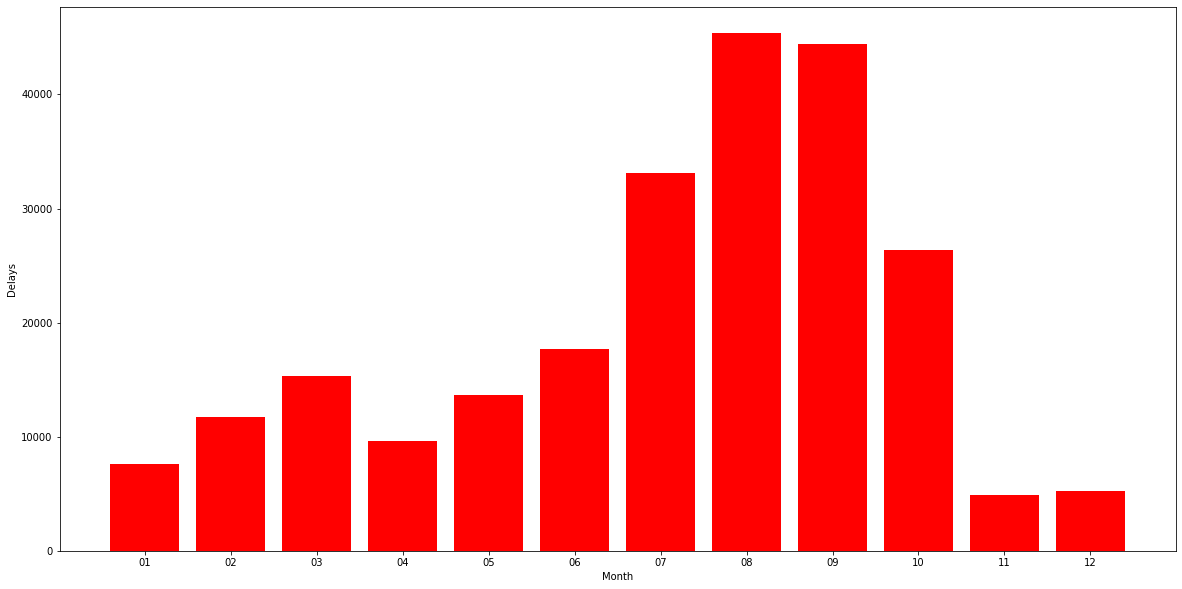

In [17]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.bar(sort_ts_delays_a.keys(), sort_ts_delays_a.values(),color="red")
plt.xlabel("Month")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

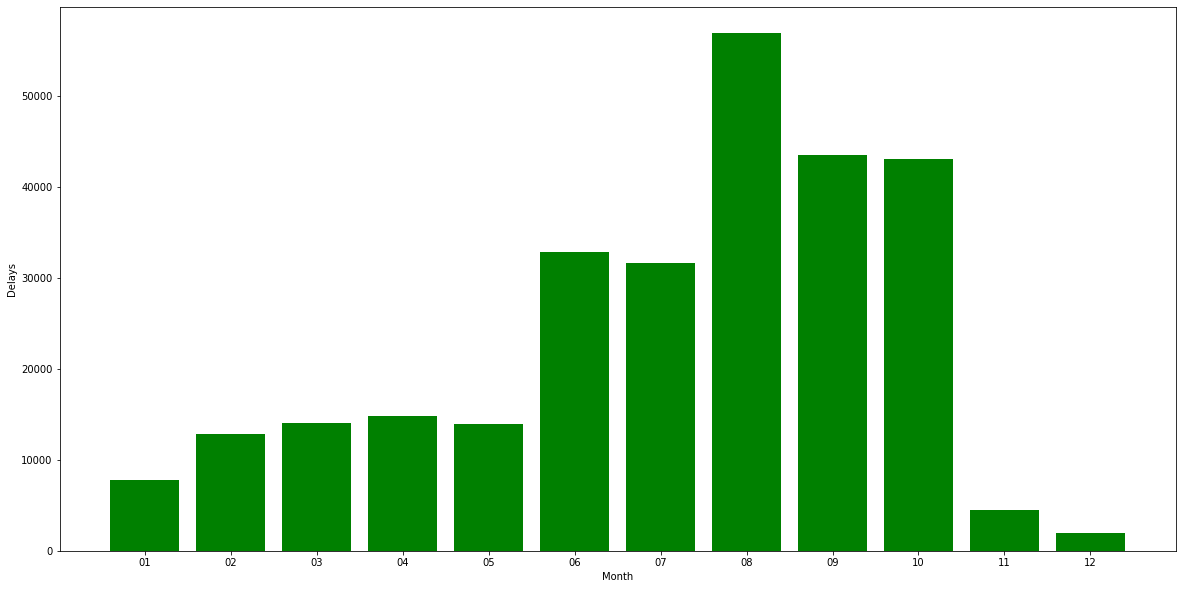

In [18]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.bar(sort_ts_delays_e.keys(), sort_ts_delays_e.values(),color="green")
plt.xlabel("Month")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

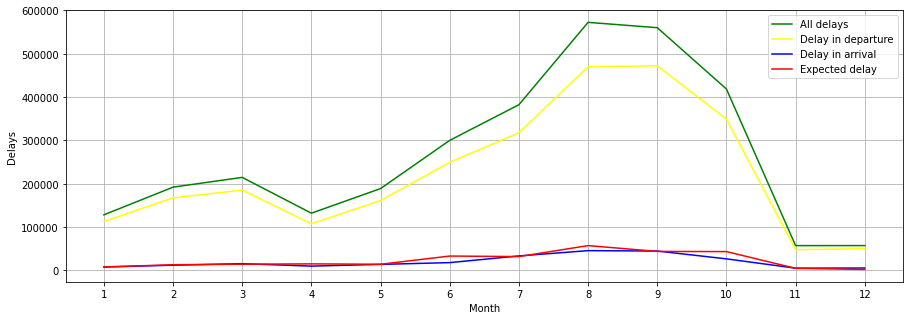

In [19]:
plt.figure(figsize=(15, 5))
plt.grid()
tsk = list(sort_ts_delays.keys())
tsk2 = []
for i in tsk:
    tsk2.append(int(i))
tsv = list(sort_ts_delays.values())
plt.xticks(tsk2)
plt.plot(tsk2, tsv, label = "All delays", color = "green")
plt.legend(loc = "upper right")

tsk_d = list(sort_ts_delays_d.keys())
tsk_d2 = []
for i in tsk_d:
    tsk_d2.append(int(i))
tsv_d = list(sort_ts_delays_d.values())
plt.xticks(tsk_d2)
plt.plot(tsk_d2, tsv_d, label = "Delay in departure", color = "yellow")
plt.legend(loc = "upper right")

tsk_a = list(sort_ts_delays_a.keys())
tsk_a2 = []
for i in tsk_a:
    tsk_a2.append(int(i))
tsv_a = list(sort_ts_delays_a.values())
plt.xticks(tsk_a2)
plt.plot(tsk_a2, tsv_a, label = "Delay in arrival", color = "blue")
plt.legend(loc = "upper right")

tsk_e = list(sort_ts_delays_e.keys())
tsk_e2 = []
for i in tsk_e:
    tsk_e2.append(int(i))
tsv_e = list(sort_ts_delays_e.values())
plt.xticks(tsk_e2)
plt.plot(tsk_e2, tsv_e, label = "Expected delay", color = "red")
plt.legend(loc = "upper right")



plt.xlabel("Month")
plt.ylabel("Delays")


In [20]:
delay_tipi_a = defaultdict(lambda: 0)
delay_tipi_d = defaultdict(lambda: 0)
delay_tipi_e = defaultdict(lambda: 0)

for ts, tn, tt, si, dt, d in delays:
    if (dt == "A"):
        delay_tipi_a[tt] += 1
    if (dt == "D"):
        delay_tipi_d[tt] += 1
    if (dt == "E"):
        delay_tipi_e[tt] += 1

print(delay_tipi_a)
print(delay_tipi_d)
print(delay_tipi_e)

defaultdict(<function <lambda> at 0x000001C3CBCA20E0>, {'MO': 698, 'EN': 29177, 'LPV': 47179, 'LP': 52964, 'UNKNOWN': 1480, 'IC': 12178, 'MV': 16501, 'EC': 62201, 'RG': 7704, 'AVT': 4603, 'ICS': 470})
defaultdict(<function <lambda> at 0x000001C3CBCA1750>, {'IC': 238887, 'LP': 768851, 'LPV': 861223, 'MO': 19155, 'EN': 104781, 'UNKNOWN': 32899, 'EC': 295135, 'RG': 154597, 'MV': 143865, 'ICS': 29994, 'AVT': 37438})
defaultdict(<function <lambda> at 0x000001C3CBCA16C0>, {'LPV': 76190, 'LP': 131853, 'UNKNOWN': 1546, 'EC': 26427, 'EN': 12507, 'RG': 8715, 'AVT': 8672, 'ICS': 295, 'MV': 13385, 'IC': 7712, 'MO': 2077})


Text(0, 0.5, 'Delays')

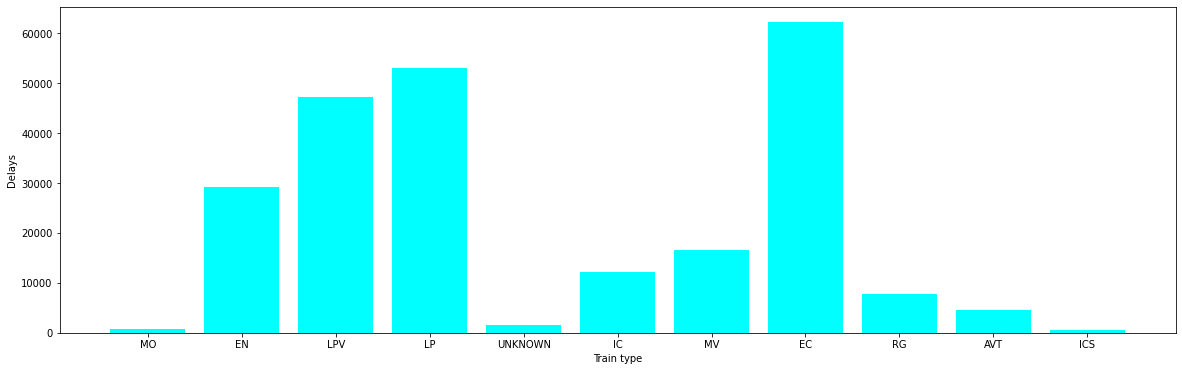

In [21]:
plt.figure(figsize=(20, 6))
#plt.xticks(rotation=90)
plt.bar(delay_tipi_a.keys(), delay_tipi_a.values(),color="cyan")
plt.xlabel("Train type")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

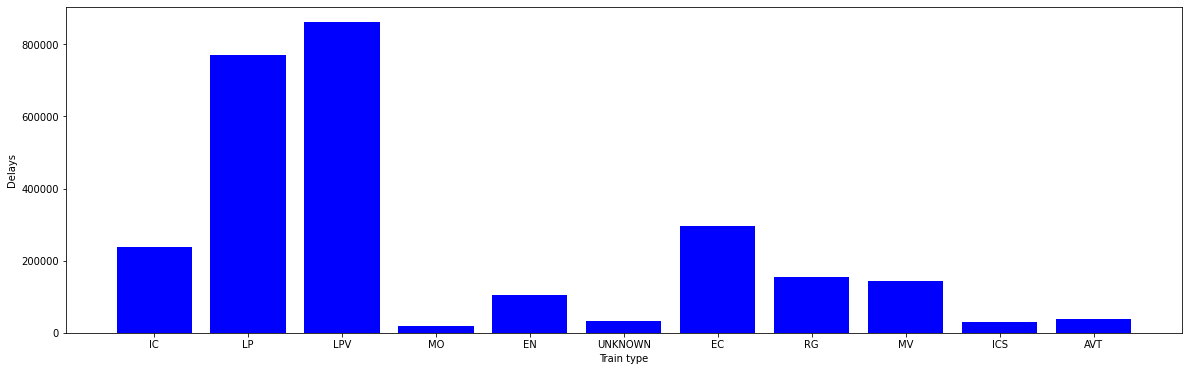

In [22]:
plt.figure(figsize=(20, 6))
#plt.xticks(rotation=90)
plt.bar(delay_tipi_d.keys(), delay_tipi_d.values(),color="blue")
plt.xlabel("Train type")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

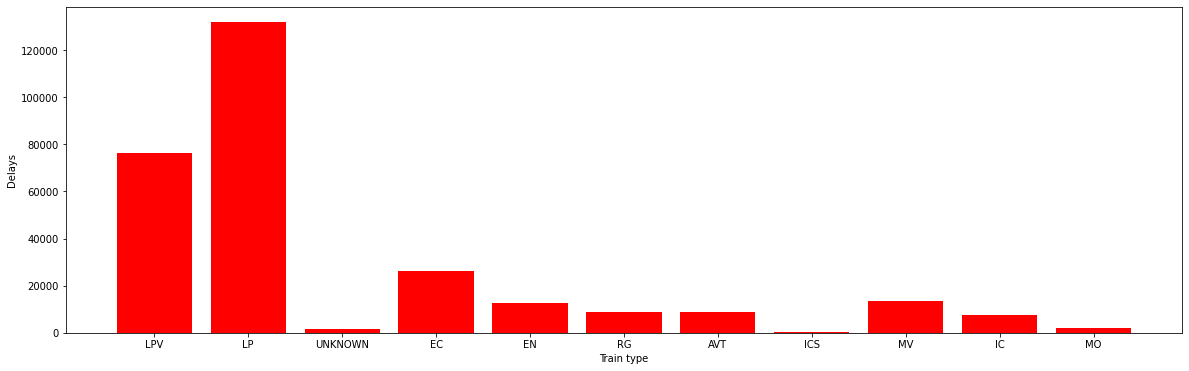

In [23]:
plt.figure(figsize=(20, 6))
#plt.xticks(rotation=90)
plt.bar(delay_tipi_e.keys(), delay_tipi_e.values(),color="red")
plt.xlabel("Train type")
plt.ylabel("Delays")

In [25]:

a = numpy.array([delay_tipi_a[tt] for tt in delay_tipi_a])
e = numpy.array([delay_tipi_e[tt] for tt in delay_tipi_a])
d = numpy.array([delay_tipi_d[tt] for tt in delay_tipi_a])
x = range(len())

plt.bar(x, gx, align="center", color=gold_color, label="zlato")
plt.bar(x, sx, align="center", bottom=gx, color=silv_color, label="srebro")
plt.bar(x, bx, align="center", bottom=gx+sx, color=bron_color, label="bron")
plt.xlim(-0.5, len(x)-0.5)
plt.legend()
plt.xticks(x)
plt.yticks(range(0, 25, 2))
plt.gca().set_xticklabels(countries, rotation=90)
plt.ylabel("število medalj")
plt.savefig('slike/odgovori/2-2-7.png', bbox_inches='tight')

NameError: name 'numpy' is not defined

In [26]:
df = pd.DataFrame(delay_tipi_a.values(), columns= delay_tipi_a)

ax = df.plot(x="X", y="A", kind="bar")
df.plot(x="X", y="B", kind="bar", ax=ax, color="C2")
df.plot(x="X", y="C", kind="bar", ax=ax, color="C3")

ValueError: Shape of passed values is (11, 1), indices imply (11, 11)

In [27]:
train_stations = defaultdict(lambda: 0)

for ts, tn, tt, si, dt, d in delays:
    if (dt == "A"):
        train_stations[nodes_dict[si]] += 1
    if (dt == "D"):
        train_stations[nodes_dict[si]] += 1
    if (dt == "E"):
        train_stations[nodes_dict[si]] += 1


KeyboardInterrupt: 

In [38]:
sort_train_stations = dict(sorted(train_stations.items(), key=lambda item: item[1], reverse=True))


In [39]:
seznam_train_stations = list(sort_train_stations.items())[0:10]

In [40]:
print(seznam_train_stations)

[('Ljubljana', 57040), ('Zidani Most', 54490), ('Kranj', 54425), ('Dobova', 51367), ('Jesenice', 47072), ('Divača', 43748), ('Bohinjska Bistrica', 38663), ('Sevnica', 30723), ('Rakek', 29325), ('Most na Soči', 29057)]


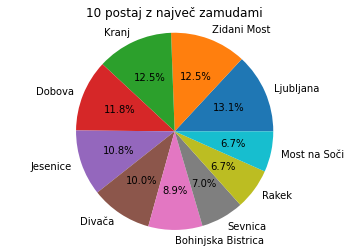

In [41]:
l = [] 
data = []

for x, y in seznam_train_stations:
    l.append(x)
    data.append(y)

fig, ax = plt.subplots()
ax.pie(data, labels=l, autopct='%1.1f%%')
ax.axis('equal')  
ax.set_title('10 postaj z največ zamudami')

plt.show()

In [30]:

slovar = defaultdict(lambda: 0)

for ts, tn, tt, si, dt, d in delays:
    slovar[si] += int(d)
    
sort = {k: v for k, v in sorted(slovar.items(), key=lambda y: y[1], reverse=True)}
df = pd.DataFrame(sort.items(), columns =['Station_id', 'delay(min)'])

df

,Station_id,delay(min)
0,42300,3101292
1,42400,2686181
2,42001,2144025
3,42200,1949111
4,42207,1382677
...,...,...
122,42907,510
123,43605,220
124,43202,160
125,42501,90


In [34]:
slovar3 = defaultdict(lambda: 0)

for ts, tn, tt, si, dt, d in delays:
    if (int(d) > 0):
        slovar3[si] += 1
        
sort = {k: v for k, v in sorted(slovar3.items(), key=lambda y: y[1], reverse=True)}
df = pd.DataFrame(sort.items(), columns =['Station_id', 'no_delays'])

df

,Station_id,delay(min)
0,42300,112714
1,42400,107223
2,42200,104024
3,42001,100478
4,42307,88345
...,...,...
122,43605,24
123,42905,20
124,42501,10
125,43202,10


In [37]:
for ts, tn, tt, si, dt, d in delays:
    if (si == "43501"):
        print (ts, tn, tt, si, dt, d)

2021-05-12 07:30 4460 LP 43501 D 14
2021-05-12 07:31 4460 LP 43501 D 14
2021-05-12 07:32 4460 LP 43501 D 14
2021-05-12 07:33 4460 LP 43501 D 14
2021-05-12 07:34 4460 LP 43501 D 14


In [42]:
povprecje = defaultdict(list)

for d in (slovar, slovar3): # you can list as many input dicts as you want here
    for key, value in d.items():
        povprecje[key].append(value)
    

In [43]:
print(povprecje)

defaultdict(<class 'list'>, {'42200': [1949111, 104024], '44100': [637383, 54682], '44200': [1145449, 82564], '43200': [252624, 19955], '43201': [588226, 43003], '43652': [24765, 2291], '43203': [546135, 36770], '43204': [420871, 27319], '43300': [543218, 35473], '43301': [277519, 19426], '43303': [186419, 11787], '43304': [275239, 19859], '42001': [2144025, 100478], '42002': [593407, 41843], '42005': [426066, 29303], '42006': [560600, 38164], '42100': [987226, 56178], '42101': [772928, 51564], '42201': [626597, 42811], '44102': [435709, 38655], '42203': [613911, 38055], '44001': [509313, 45738], '42204': [682811, 43850], '43002': [549465, 41584], '42206': [648156, 43549], '43411': [136489, 8661], '42207': [1382677, 39446], '44008': [641081, 54788], '43100': [787654, 50688], '42208': [811301, 55001], '42210': [760684, 53911], '43500': [114765, 8681], '42222': [857378, 61811], '44009': [425331, 36644], '42300': [3101292, 112714], '44010': [349878, 30030], '43502': [75719, 5675], '44500'

In [60]:
slovar4 = defaultdict(lambda: 0)

for x in povprecje.items():
    #print(x[1][0])
    pop = int(x[1][0]) / int(x[1][1])
    slovar4[x[0]] = pop

print(slovar4)

defaultdict(<function <lambda> at 0x000001C3CDBFF010>, {'42200': 18.737127970468354, '44100': 11.656175706813942, '44200': 13.873467855239571, '43200': 12.659684289651716, '43201': 13.678720089296096, '43652': 10.809690091663029, '43203': 14.852733206418275, '43204': 15.405798162451042, '43300': 15.31356242776196, '43301': 14.285956964892412, '43303': 15.815644353949265, '43304': 13.859660607281333, '42001': 21.33825314994327, '42002': 14.181750830485386, '42005': 14.5400129679555, '42006': 14.689235929147888, '42100': 17.57317811242835, '42101': 14.989682724381352, '42201': 14.636355142369952, '44102': 11.271737162074764, '42203': 16.132203389830508, '44001': 11.13544536271809, '42204': 15.5715165336374, '43002': 13.21337533666795, '42206': 14.883372752531631, '43411': 15.759034753492669, '42207': 35.05240075039294, '44008': 11.70112068336132, '43100': 15.539259785353535, '42208': 14.750659078925837, '42210': 14.109996104691065, '43500': 13.220251123142495, '42222': 13.870961479348336

In [80]:
zamude = defaultdict(lambda: 0)
for x, y in slovar4.items():
    zamude[nodes_dict[x]] = y
    
sort = {k: v for k, v in sorted(zamude.items(), key=lambda y: y[1], reverse=True)[:10]}
df = pd.DataFrame(sort.items(), columns =['Station', 'delay_avg'])

df

,Station,delay_avg
0,Šentrupert,66.000000
1,Mokronog,54.000000
2,Litija,35.052401
3,Novo mesto Kandija,34.300000
4,Šentilj,27.796242
5,Kamnik Graben,27.607800
6,Ljubljana,27.514701
7,Jesenice,25.052284
8,Metlika,23.561525
9,Žirovnica,23.158382


Text(0, 0.5, 'povprečna zamuda (min)')

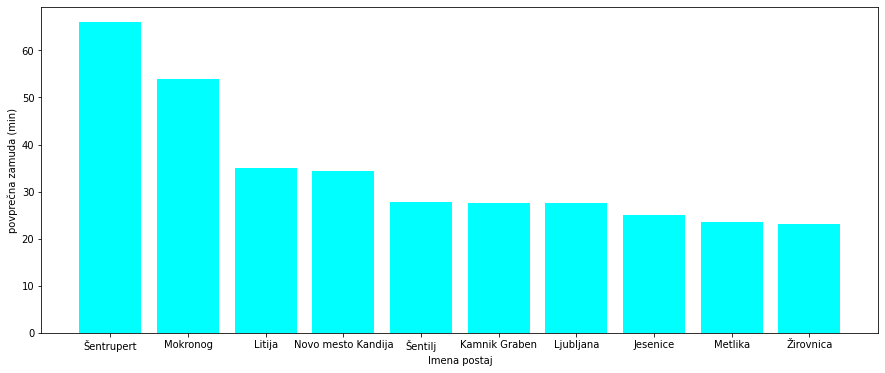

In [98]:
plt.figure(figsize=(15, 6))
#plt.xticks(rotation=90)
plt.bar(sort.keys(), sort.values(), color="cyan")
plt.xlabel("Imena postaj")
plt.ylabel("povprečna zamuda (min)")